# Explanatory Data Analysis (EDA)
通し課題 : Kickstarter Projects

クラウドファンディングが成功するか否かを予測するコンペだが、このデータセットを利用して、回帰分析を行う。
https://www.kaggle.com/kemical/kickstarter-projects

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("./datasets/ks-projects-201801.csv", sep=',',parse_dates=['deadline', 'launched'])
display(df.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


## 目的変数  
**achievement_rate** : (資金調達の達成率)  
※回帰問題にするために、「ドル換算された集まった資金÷ドル換算された資金調達の目標」で算出する。  
achievement_rate =  usd_pledged_real / usd_goal_real
  
## 説明変数  
  
**name** : (プロジェクトの名前)  
**category** : (カテゴリー)  
**main_category** : (メインカテゴリー)  
**currency** : (サポートに使用される通貨)  
**deadline** : (クラウドファンディングの締め切り)  
**goal** : (資金調達の目標。クリエイターがプロジェクトを完了するために必要な金額)  各国の通貨
**launched** : (開始した日時)  
**pledged** : (集まった資金　※各国の通貨単位)  
**backers** : (バッカーの数)  
**country** : (プロジェクトが開かれた国)  
**usd pledged** : (集まった資金の米ドル換算(kickstarterによる変換))  
**usd_pledged_real** : (集まった資金の米ドル換算(Fixer.io APIからの変換))  
**usd_goal_real** : (資金調達の目標。(Fixer.io APIからの変換))  

**※Backer（バッカー）**  
Kickstarter上のアイディアを実現するためにプロジェクトにお金を提供し、支援する人のこと。  
バッカーになることで、希望者はクリエイターによって設けられた、様々なリワードを受け取ることもできる。

## 前提事項
- クラウドファンディング開始後に得るデータは、説明変数として使用しない事とする。
    - pledged : (集まった資金)
    - usd pledged : (集まった資金の米ドル換算(kickstarterによる変換))
    - usd_pledged_real : (集まった資金の米ドル換算(Fixer.io APIからの変換))
    - backers : (バッカーの数)  
- 資金調達の目標は、ドル換算された値「usd_goal_real」を利用するため、「goal」は利用しない。

In [3]:
# 目的変数を算出
df['achievement_rate'] = df['usd_pledged_real']*100/df['usd_goal_real']

# 必要のないデータをドロップ
df = df.drop(['pledged','usd pledged','goal','backers','state'], axis=1)
# df = df.drop(['pledged','usd pledged','usd_pledged_real','goal','backers'], axis=1)

In [4]:
# データ型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 11 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
launched            378661 non-null datetime64[ns]
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
achievement_rate    378661 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 31.8+ MB


In [5]:
# 基礎統計データの確認
df.describe()

,ID,usd_pledged_real,usd_goal_real,achievement_rate
count,378661.00,378661.00,378661.00,378661.00
mean,1074731191.99,9058.92,45454.40,323.61
std,619086204.32,90973.34,1152950.06,26690.54
min,5971.00,0.00,0.01,0.00
25%,538263516.00,31.00,2000.00,0.45
50%,1075275634.00,624.33,5500.00,13.46
75%,1610148624.00,4050.00,15500.00,106.54
max,2147476221.00,20338986.27,166361390.71,10427789.00


,Total,Percent
name,4,0.00
achievement_rate,0,0.00
usd_goal_real,0,0.00
usd_pledged_real,0,0.00
country,0,0.00
launched,0,0.00
deadline,0,0.00
currency,0,0.00
main_category,0,0.00
category,0,0.00


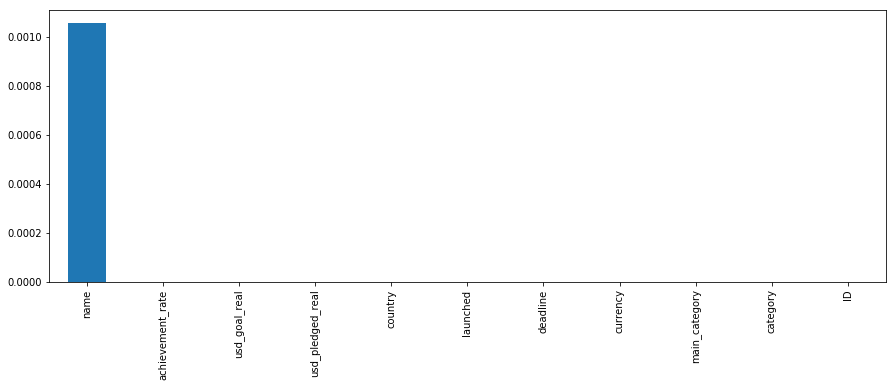

In [6]:
# 欠損値を確認する
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data)
missing_data['Percent'].plot.bar(figsize=(15,5))

### 欠損値について
欠損値は、nameに4件存在する。
それ以外に関しては、欠損値はないため、今回は欠損値処理をする必要がないことがわかる。

In [7]:
# df = df.drop(['name'], axis=1)

### 目的変数「achievement_rate」を分析する

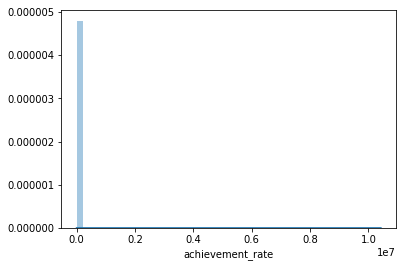

In [8]:
sns.distplot(df['achievement_rate'])

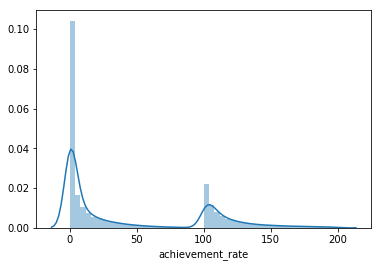

In [9]:
sns.distplot(df[df['achievement_rate']<200]['achievement_rate'])

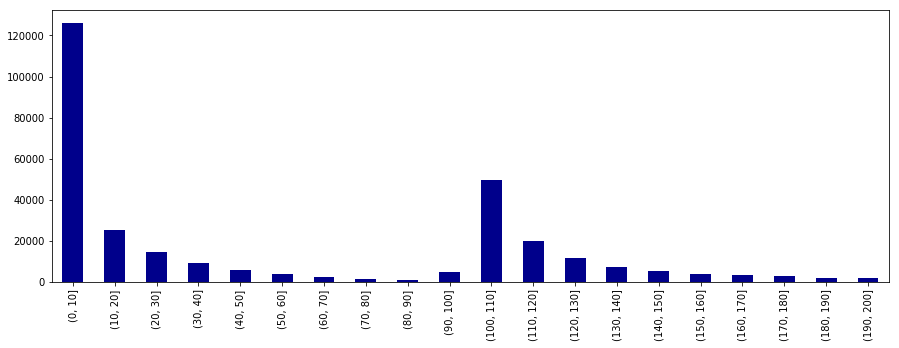

In [10]:
pd.cut(df['achievement_rate'], range(0,201,10)).value_counts(sort=False).plot.bar(figsize=(15,5), color='darkblue')

「資金調達の達成率」は、0%と100%付近のデータが多いことがわかる。  
そこで、0%~100%、101%~1000%、10000%~100000%、100000%~10000000%の範囲で、データ数の違いを確認する。

(0, 100]             0.59
(100, 1000]          0.39
(1000, 10000]        0.01
(10000, 100000]      0.00
(100000, 10000000]   0.00
Name: achievement_rate, dtype: float64


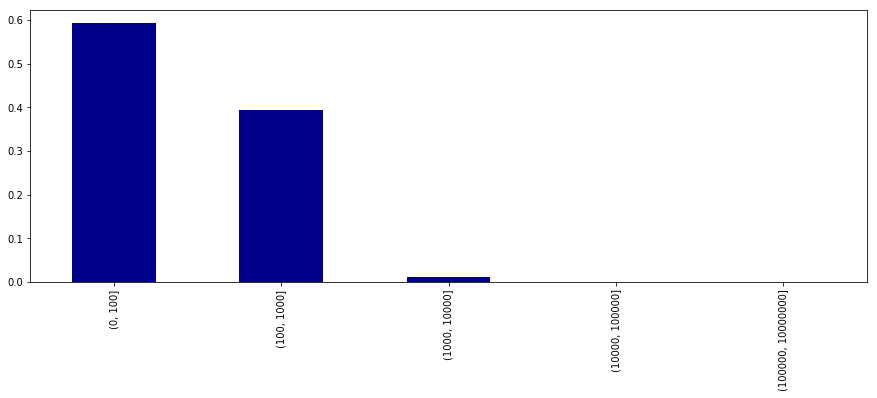

In [11]:
print(pd.cut(df['achievement_rate'], [0, 100, 1000, 10000, 100000,10000000]).value_counts(normalize=True))
display(pd.cut(df['achievement_rate'], [0, 100, 1000, 10000, 100000,10000000]).value_counts(normalize=True).plot.bar(figsize=(15,5), color='darkblue'))

「資金調達の達成率」は、  
0%~101%で、全データの59%を占める  
101%~1000%で、全データの39%を占める  

つまり、**0%~1000%までで、全データの98.7%を占めることがわかる。**  
　  
①0%~100%のデータ分布を確認する。  
②100%~1000%のデータ分布を確認する。　　  

(0, 10]      126109
(10, 20]      25338
(20, 30]      14280
(30, 40]       9115
(40, 50]       5741
(90, 100]      4532
(50, 60]       3683
(60, 70]       2300
(70, 80]       1354
(80, 90]        828
Name: achievement_rate, dtype: int64
(0, 10]     0.65
(10, 20]    0.13
(20, 30]    0.07
(30, 40]    0.05
(40, 50]    0.03
(90, 100]   0.02
(50, 60]    0.02
(60, 70]    0.01
(70, 80]    0.01
(80, 90]    0.00
Name: achievement_rate, dtype: float64


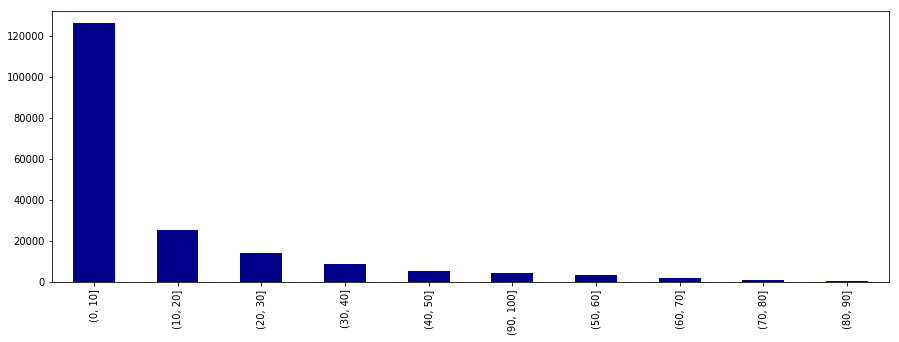

In [12]:
# ①0%~100%のデータ分布を確認する。
print(pd.cut(df['achievement_rate'], [0,10,20,30,40,50,60,70,80,90,100]).value_counts())
print(pd.cut(df['achievement_rate'], [0,10,20,30,40,50,60,70,80,90,100]).value_counts(normalize=True))
pd.cut(df['achievement_rate'], [0,10,20,30,40,50,60,70,80,90,100]).value_counts().plot.bar(figsize=(15,5), color='darkblue')

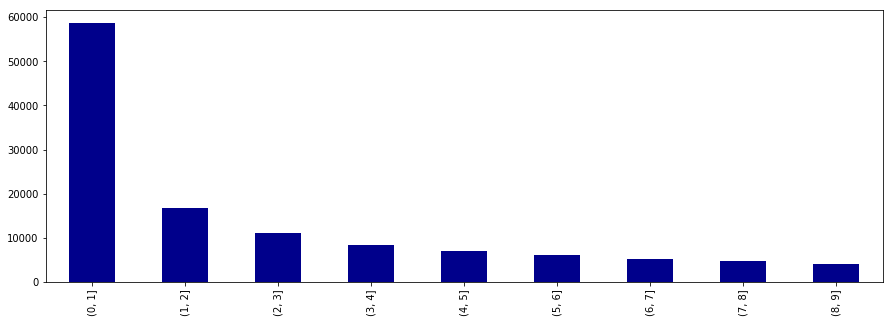

In [13]:
pd.cut(df['achievement_rate'], range(10)).value_counts().plot.bar(figsize=(15,5), color='darkblue')

全データの59%を占める「資金調達の達成率」が0%~100%のデータ分布を確かめた。    
その中の65%のデータが0~10であることがわかる。  
また、0~10のデータ分布を確認すると、0~1のデータ件数が約60000件ある事がわかる。  
データは総数38万件あるため、全体の約16%が0~1%である事がわかる。  

(100, 200]     106932
(200, 300]      10047
(300, 400]       4390
(400, 500]       2521
(500, 600]       1675
(600, 700]       1127
(700, 800]        868
(800, 900]        626
(900, 1000]       479
Name: achievement_rate, dtype: int64
(100, 200]    0.83
(200, 300]    0.08
(300, 400]    0.03
(400, 500]    0.02
(500, 600]    0.01
(600, 700]    0.01
(700, 800]    0.01
(800, 900]    0.00
(900, 1000]   0.00
Name: achievement_rate, dtype: float64


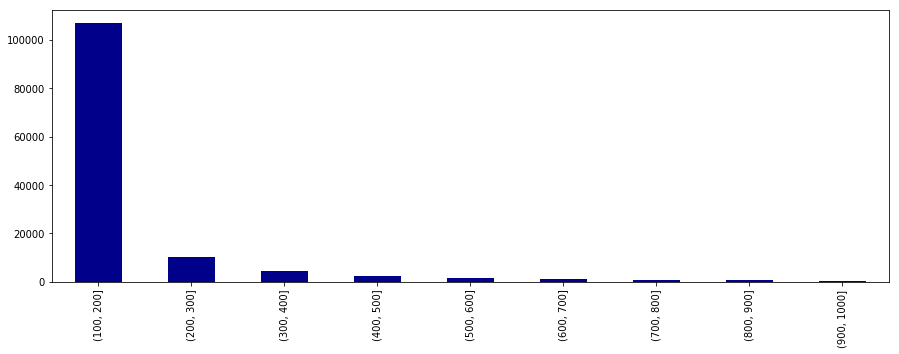

In [14]:
# ②100%~1000%のデータ分布を確認する。
print(pd.cut(df['achievement_rate'], [100,200,300,400,500,600,700,800,900,1000]).value_counts())
print(pd.cut(df['achievement_rate'], [100,200,300,400,500,600,700,800,900,1000]).value_counts(normalize=True))
pd.cut(df['achievement_rate'], [100,200,300,400,500,600,700,800,900,1000]).value_counts().plot.bar(figsize=(15,5), color='darkblue')

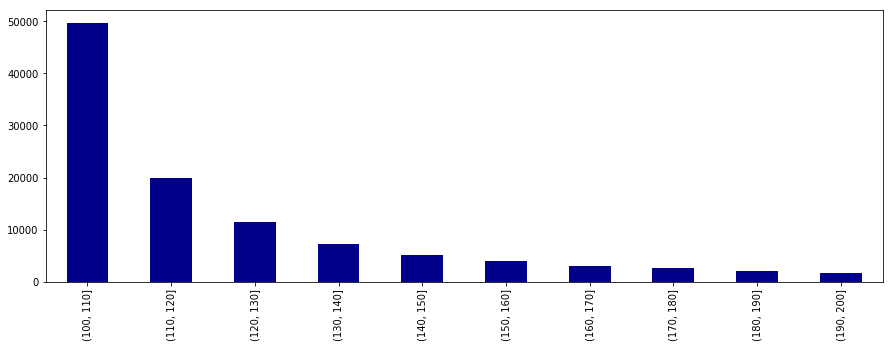

In [15]:
pd.cut(df['achievement_rate'], range(100,202,10)).value_counts().plot.bar(figsize=(15,5), color='darkblue')

全データの39%を占める「資金調達の達成率」が101%~1000%のデータ分布を確かめた。  
その中の83%のデータが100~200であることがわかる。  
また、100~1000のデータ分布を確認すると、100~110のデータ件数が約50000件ある事がわかる。  
データは総数38万件あるため、全体の約21%が100~110%である事がわかる。  

## 目的変数「資金調達の達成率」の分析結果
  
- **0%~1000%までで、全データの98.7%を占める**
- **0%~200%までで、全データの92%を占める**
- **0%と100%付近にデータが多数分布している。**
    - **0%~1%に全データの16%を占める。**
    - **100~110%に全データの21%を占める。**    
### 目的変数「資金調達の達成率」が200%以上の値を異常値とする  

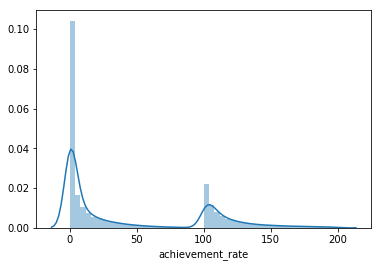

In [16]:
# 資金調達の達成率」が200%以下を再掲
sns.distplot(df[df['achievement_rate']<200]['achievement_rate'])

# 説明変数を分析する
 ## 目的変数「資金調達の達成率」が200%未満の者を対象とする。
 
 **name** : (プロジェクトの名前)  
**category** : (カテゴリー)  
**main_category** : (メインカテゴリー)  
**currency** : (サポートに使用される通貨)  
**deadline** : (クラウドファンディングの締め切り)  
**goal** : (資金調達の目標。クリエイターがプロジェクトを完了するために必要な金額)  
**launched** : (開始した日時)  
**country** : (プロジェクトが開かれた国)  

In [17]:
df = df[df['achievement_rate']<200]

In [18]:
# 連続変数とカテゴリ変数を格納
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("連続変数")
print(numerical_feats)
print("カテゴリ変数")
print(categorical_feats)

連続変数
Index(['ID', 'deadline', 'launched', 'usd_pledged_real', 'usd_goal_real',
       'achievement_rate'],
      dtype='object')
カテゴリ変数
Index(['name', 'category', 'main_category', 'currency', 'country'], dtype='object')


# カテゴリ変数の分析

In [19]:
for column in categorical_feats:
    print("【{}】 {}種類".format(column,df[column].nunique()))

【name】 349911種類
【category】 159種類
【main_category】 15種類
【currency】 14種類
【country】 23種類


## main_category
- 15種類

Film & Video    62162
Music           50237
Publishing      37967
Technology      29773
Games           29055
Art             26128
Design          25526
Food            23789
Fashion         21500
Theater         10650
Photography     10273
Comics           9088
Crafts           8092
Journalism       4637
Dance            3702
Name: main_category, dtype: int64


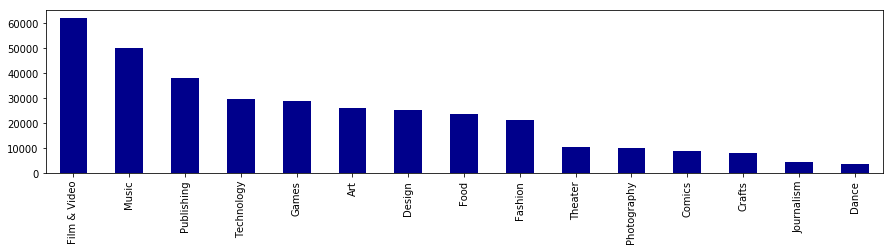

In [20]:
#データの分布を確認
print(df['main_category'].value_counts())
display(df['main_category'].value_counts().plot.bar(figsize=(15, 3), color='darkblue'))

In [21]:
# 統計データの確認
grouped_main_category = df.groupby('main_category')
Statistics_main_category = grouped_main_category.describe()['achievement_rate']
Statistics_main_category

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,26128.00,49.87,56.21,0.00,0.55,15.72,104.66,199.92
Comics,9088.00,66.46,61.05,0.00,4.66,46.90,116.79,200.00
Crafts,8092.00,28.49,47.83,0.00,0.05,3.02,27.68,199.50
Dance,3702.00,73.88,53.10,0.00,8.62,101.33,110.09,198.19
Design,25526.00,41.79,53.35,0.00,1.48,12.84,91.59,199.90
Fashion,21500.00,31.55,48.78,0.00,0.05,4.24,38.32,198.99
Film & Video,62162.00,46.97,54.25,0.00,0.33,11.67,103.33,200.00
Food,23789.00,31.91,48.59,0.00,0.06,3.14,45.16,199.50
Games,29055.00,38.98,53.83,0.00,0.61,8.70,64.92,200.00


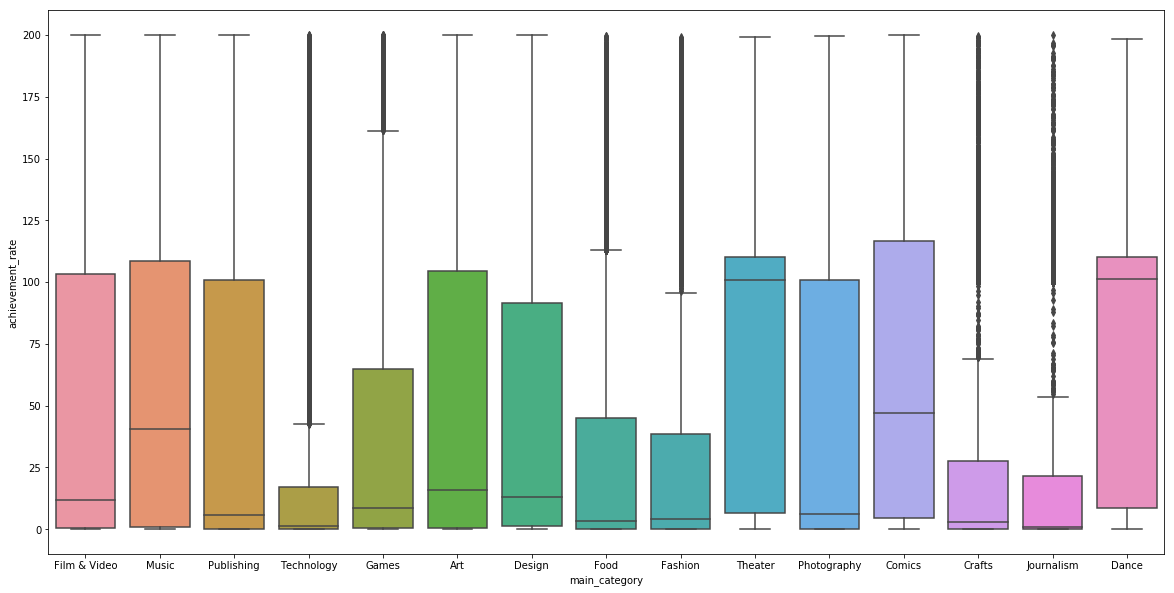

In [22]:
# 統計データを箱ひげ図で可視化
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x="main_category", y="achievement_rate",order=df['main_category'].value_counts().index)

## main_categoryの分析結果

### データ数が多いカテゴリランキング
１位 : 「Film & Video」　62162件  
2位 : 「Music」　50237件  
3位 : 「Publishing」　37967件  

### 「資金調達の達成率」の平均値が高いランキング
１位 : 「Dance」　73.8% 3702件  
2位 : 「Theater」　71.8% 10650件　　  
3位 : 「Comics」　66.4% 9088件  

### main_categoryの基礎統計マスタを作成し、説明変数を追加する。

## category
- 159種類

Product Design      18696
Documentary         15816
Music               15201
Shorts              12059
Video Games         11151
Food                11010
Film & Video         9889
Tabletop Games       9501
Fiction              8818
Fashion              8122
Nonfiction           8048
Art                  7684
Theater              6889
Apparel              6856
Rock                 6514
Children's Books     6491
Technology           6397
Apps                 6281
Publishing           5717
Webseries            5641
Name: category, dtype: int64


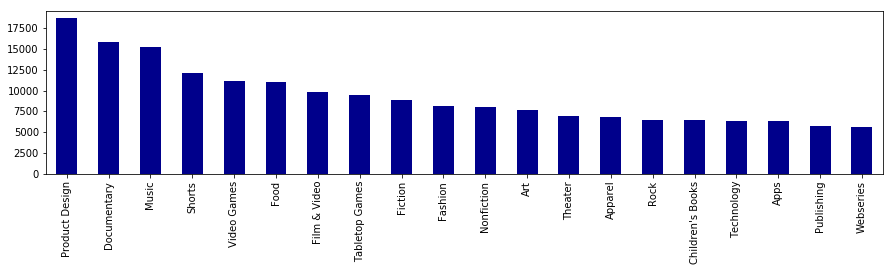

In [23]:
# データ件数が上位20のカテゴリを表示
top_num = 20
df_category_series = df['category'].value_counts()
print(df_category_series[:top_num])
display(df_category_series[:top_num].plot.bar(figsize=(15, 3), color='darkblue'))

In [24]:
# 統計データの確認　
# データ件数がTOP20件
grouped_category = df.groupby('category')
Statistics_category = grouped_category.describe()['achievement_rate']
Statistics_category.sort_values('count', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Product Design,18696.00,42.45,53.30,0.00,2.01,14.00,89.90,199.90
Documentary,15816.00,46.55,54.09,0.00,0.52,11.79,103.68,199.89
Music,15201.00,59.38,57.12,0.00,0.83,36.28,108.18,199.47
Shorts,12059.00,66.23,55.15,0.00,4.71,100.00,108.50,199.87
Video Games,11151.00,27.42,46.04,0.00,0.34,4.05,26.64,199.82
Food,11010.00,36.88,50.43,0.00,0.28,6.61,100.04,199.50
Film & Video,9889.00,41.27,53.24,0.00,0.08,5.17,101.75,200.00
Tabletop Games,9501.00,60.71,59.55,0.00,6.80,35.41,112.26,199.92
Fiction,8818.00,31.83,50.02,0.00,0.07,3.11,39.79,198.86


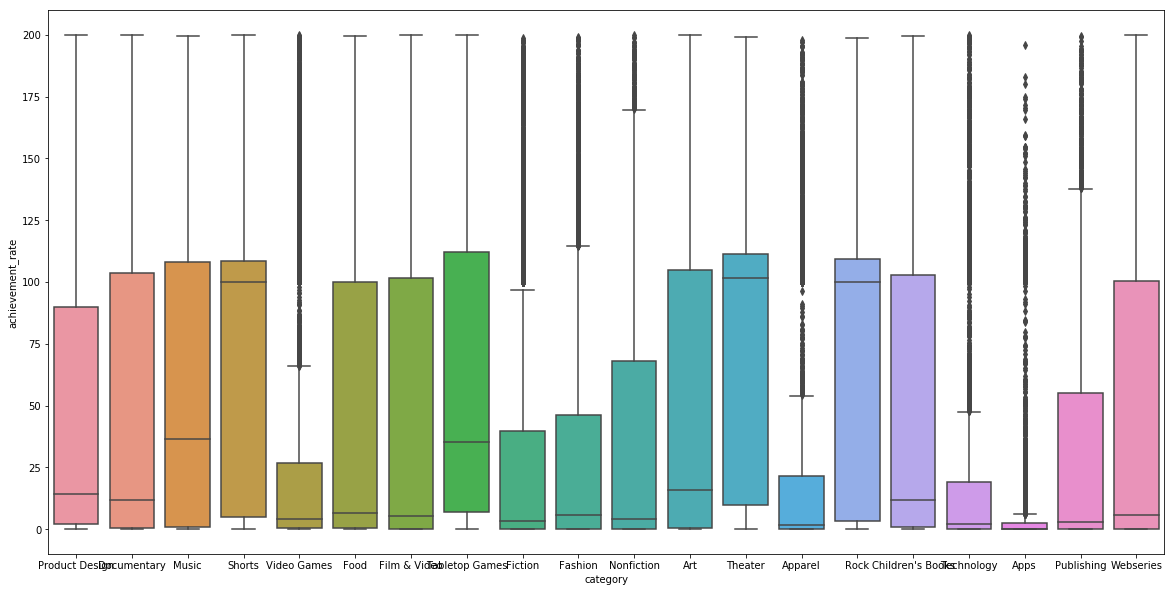

In [25]:
# 統計データを箱ひげ図で可視化
# データ件数がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['category'].isin(Statistics_category.sort_values('count', ascending=False).index[:top_num])], x="category", y="achievement_rate",order=Statistics_category.sort_values('count', ascending=False).index[:top_num])

In [26]:
# 統計データの確認　
# 「資金調達の達成率」の平均値がTOP20件
Statistics_category.sort_values('mean', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Chiptune,30.00,96.71,58.29,0.00,74.70,108.48,132.37,178.40
Anthologies,650.00,87.00,61.08,0.00,19.51,106.35,127.56,200.00
Residencies,69.00,82.30,48.47,0.00,17.89,102.66,110.17,184.00
Dance,2276.00,79.48,51.46,0.00,16.75,102.30,111.59,197.60
Indie Rock,5385.00,78.28,54.89,0.00,12.50,102.50,114.29,199.80
Country & Folk,4308.00,78.14,55.20,0.00,11.56,103.08,115.34,198.80
Classical Music,2539.00,76.08,52.95,0.00,11.09,101.92,111.31,199.00
Theater,6889.00,75.02,53.39,0.00,9.73,101.56,111.39,199.33
Letterpress,42.00,74.02,63.97,0.00,2.16,102.09,116.30,194.40


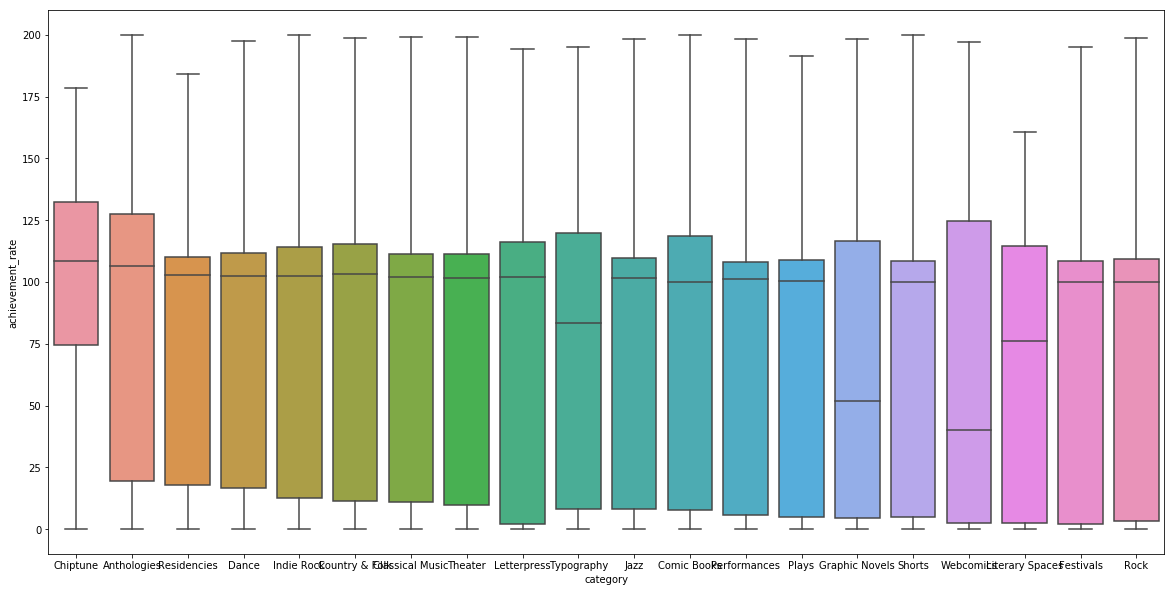

In [27]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['category'].isin(Statistics_category.sort_values('mean', ascending=False).index[:top_num])], x="category", y="achievement_rate",order=Statistics_category.sort_values('mean', ascending=False).index[:top_num])

## categoryの分析結果

### 159種類  
### データ件数TOP5  
１位 : 「Product Design」　18696件  
2位 : 「Documentary」　15816件  
3位 : 「Music」　15201件  
4位 : 「Shorts」　12059件  
5位 : 「Video Games」　11151件  

### 「資金調達の達成率」の平均値TOP5  
１位 : 「Chiptune」　30件  96.7%  
2位 : 「Anthologies」　650件  87.0%  
3位 : 「Residencies」　69件  82.2%  
4位 : 「Dance」　2276件  79.4%  
5位 : 「Indie Rock」　5385件  78.2%  

### categoryの基礎統計マスタを作成し、説明変数を追加する。

## currency
- 14種類

USD    275312
GBP     31519
EUR     16325
CAD     13895
AUD      7369
MXN      1699
SEK      1628
NZD      1367
DKK      1032
CHF       710
NOK       685
HKD       518
SGD       480
JPY        40
Name: currency, dtype: int64


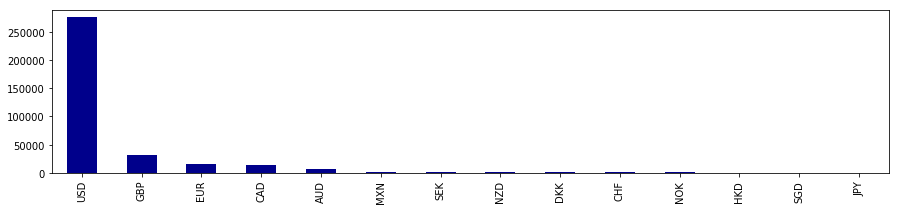

In [28]:
print(df['currency'].value_counts())
display(df['currency'].value_counts().plot.bar(figsize=(15, 3), color='darkblue'))

In [29]:
# 統計データの確認　
# データ件数がTOP20件
grouped_currency = df.groupby('currency')
Statistics_currency = grouped_currency.describe()['achievement_rate']
Statistics_currency.sort_values('count', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
currency,,,,,,,,
USD,275312.00,45.75,54.98,0.00,0.42,11.18,103.32,199.99
GBP,31519.00,43.97,55.10,0.00,0.27,9.23,102.16,200.00
EUR,16325.00,28.01,46.64,0.00,0.02,2.27,29.24,200.00
CAD,13895.00,34.47,50.90,0.00,0.04,4.01,59.72,199.93
AUD,7369.00,31.34,49.04,0.00,0.05,3.00,40.00,200.00
MXN,1699.00,28.68,45.41,0.00,0.00,2.23,35.27,196.84
SEK,1628.00,33.72,50.24,0.00,0.05,4.48,48.69,198.05
NZD,1367.00,37.95,52.95,0.00,0.23,5.92,100.01,198.77
DKK,1032.00,38.71,52.89,0.00,0.06,5.76,100.50,196.79


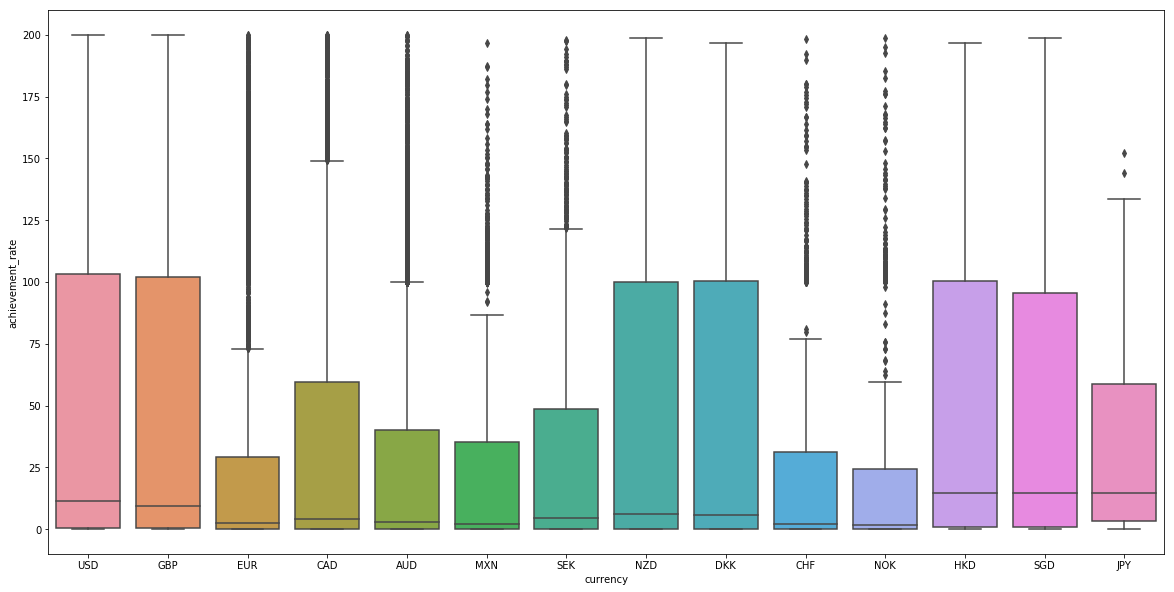

In [30]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['currency'].isin(Statistics_currency.sort_values('count', ascending=False).index[:top_num])], x="currency", y="achievement_rate",order=Statistics_currency.sort_values('count', ascending=False).index[:top_num])

In [31]:
# 統計データの確認　
# 「資金調達の達成率」の平均値がTOP20件
Statistics_currency.sort_values('mean', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
currency,,,,,,,,
USD,275312.00,45.75,54.98,0.00,0.42,11.18,103.32,199.99
HKD,518.00,45.39,55.61,0.00,0.75,14.48,100.50,196.64
GBP,31519.00,43.97,55.10,0.00,0.27,9.23,102.16,200.00
SGD,480.00,43.64,54.12,0.00,0.92,14.45,95.54,198.88
DKK,1032.00,38.71,52.89,0.00,0.06,5.76,100.50,196.79
NZD,1367.00,37.95,52.95,0.00,0.23,5.92,100.01,198.77
JPY,40.00,37.17,46.33,0.00,3.19,14.60,58.69,152.27
CAD,13895.00,34.47,50.90,0.00,0.04,4.01,59.72,199.93
SEK,1628.00,33.72,50.24,0.00,0.05,4.48,48.69,198.05


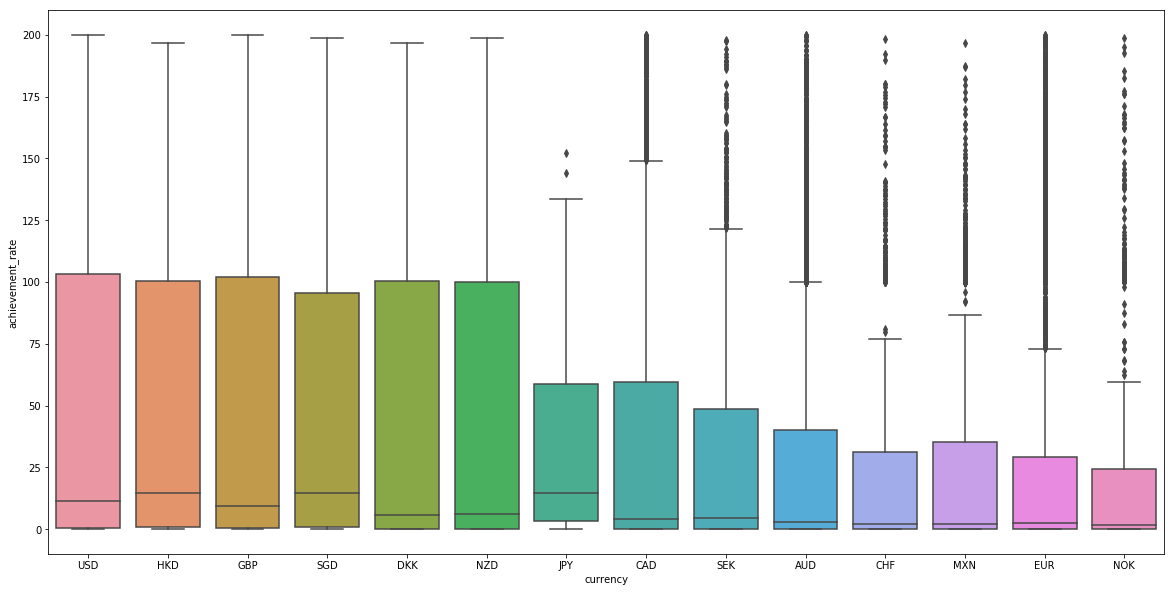

In [32]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['currency'].isin(Statistics_currency.sort_values('mean', ascending=False).index[:top_num])], x="currency", y="achievement_rate",order=Statistics_currency.sort_values('mean', ascending=False).index[:top_num])

## currencyの分析結果

### 14種類  
### データ件数TOP5  
１位 : 「USD」　275312件  
2位 : 「GBP」　31519件  
3位 : 「EUR」　16325件  
4位 : 「CAD」　13895件  
5位 : 「AUD」　7369件  

### 「資金調達の達成率」の平均値TOP5  
１位 : 「USD」　27531件  45.7%  
2位 : 「HKD」　518件  45.3%  
3位 : 「GBP」　31519件  43.9%  
4位 : 「SGD」　480件  43.6%  
5位 : 「DKK」　1032件  38.7%  

### currencyの基礎統計マスタを作成し、説明変数を追加する。

## countryの分析
- 23種類の国

US      272607
GB       31065
CA       13691
AU        7258
DE        3878
N,0"      3751
NL        2730
IT        2726
FR        2705
ES        2119
MX        1699
SE        1597
NZ        1339
DK        1017
IE         771
CH         703
NO         672
BE         584
AT         571
HK         518
SG         480
LU          58
JP          40
Name: country, dtype: int64


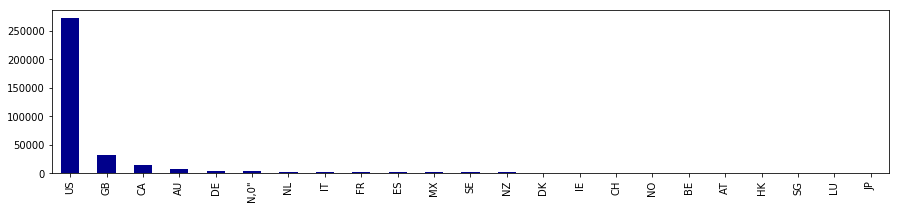

In [33]:
print(df['country'].value_counts())
display(df['country'].value_counts().plot.bar(figsize=(15, 3), color='darkblue'))

In [34]:
# 統計データの確認　
# データ件数がTOP20件
grouped_country = df.groupby('country')
Statistics_country = grouped_country.describe()['achievement_rate']
Statistics_country.sort_values('count', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
US,272607.00,45.63,54.96,0.00,0.42,11.12,103.25,199.99
GB,31065.00,43.76,55.04,0.00,0.27,9.11,102.01,200.00
CA,13691.00,34.31,50.82,0.00,0.04,4.00,57.49,199.93
AU,7258.00,31.10,48.90,0.00,0.05,3.00,39.11,200.00
DE,3878.00,28.05,46.02,0.00,0.04,2.75,30.24,197.70
"N,0""",3751.00,54.67,56.35,0.00,0.10,17.24,106.50,200.00
NL,2730.00,27.51,46.39,0.00,0.01,2.00,27.60,199.31
IT,2726.00,19.50,39.86,0.00,0.00,0.90,12.15,200.00
FR,2705.00,37.17,52.31,0.00,0.08,5.25,100.00,199.85


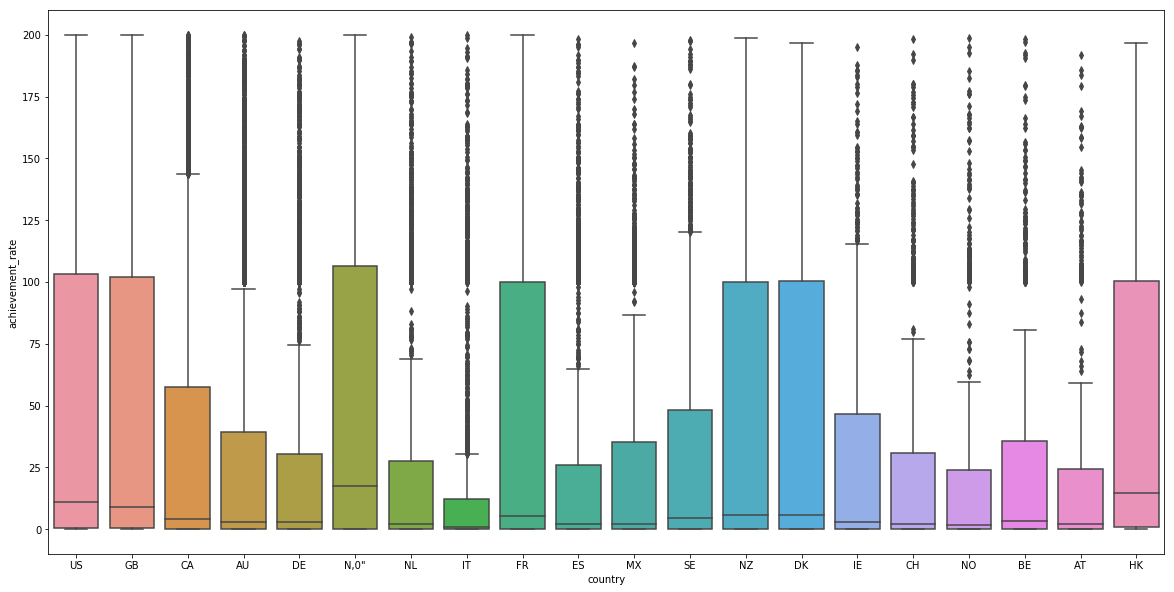

In [35]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['country'].isin(Statistics_country.sort_values('count', ascending=False).index[:top_num])], x="country", y="achievement_rate",order=Statistics_country.sort_values('count', ascending=False).index[:top_num])

In [36]:
Statistics_country.sort_values('mean', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
"N,0""",3751.00,54.67,56.35,0.00,0.10,17.24,106.50,200.00
US,272607.00,45.63,54.96,0.00,0.42,11.12,103.25,199.99
HK,518.00,45.39,55.61,0.00,0.75,14.48,100.50,196.64
GB,31065.00,43.76,55.04,0.00,0.27,9.11,102.01,200.00
SG,480.00,43.64,54.12,0.00,0.92,14.45,95.54,198.88
DK,1017.00,38.57,52.89,0.00,0.08,5.73,100.32,196.79
NZ,1339.00,37.40,52.63,0.00,0.23,5.88,100.00,198.77
JP,40.00,37.17,46.33,0.00,3.19,14.60,58.69,152.27
FR,2705.00,37.17,52.31,0.00,0.08,5.25,100.00,199.85


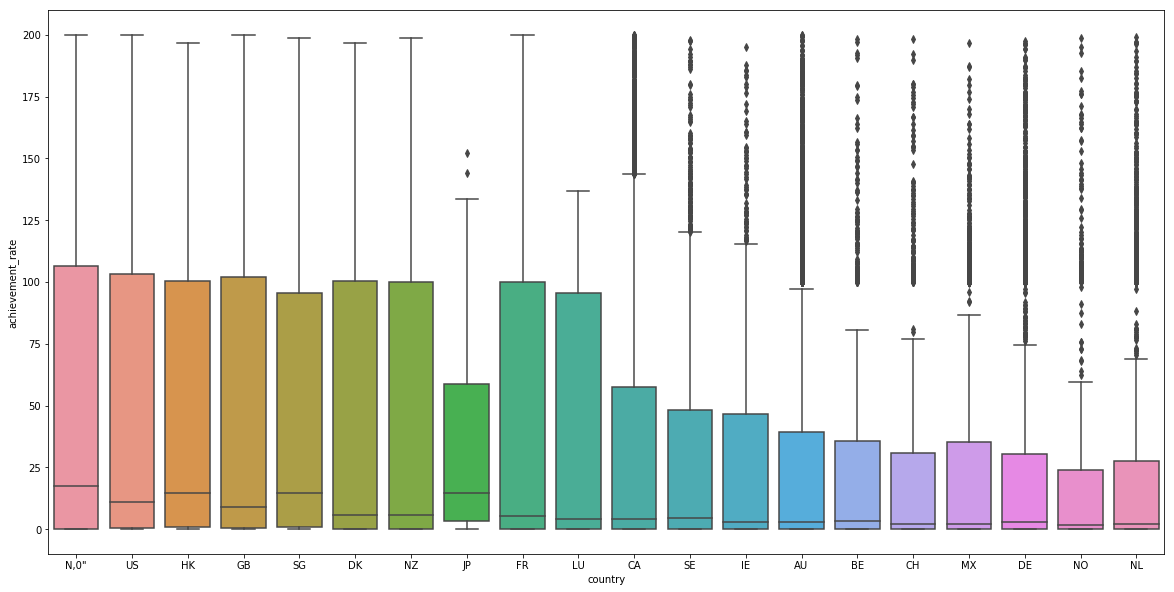

In [37]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['country'].isin(Statistics_country.sort_values('mean', ascending=False).index[:top_num])], x="country", y="achievement_rate",order=Statistics_country.sort_values('mean', ascending=False).index[:top_num])

## countryの分析結果

### 14種類  
### データ件数TOP5  
１位 : 「US」　272607件  
2位 : 「GB」　31065件  
3位 : 「CA」　13691件  
4位 : 「AU」　7258件  
5位 : 「DE」　3878件  

### 「資金調達の達成率」の平均値TOP5  
１位 : 「N,0"」　3751件  54.6%  
2位 : 「US」　272607件  45.6%  
3位 : 「HK」　518件  45.3%  
4位 : 「GB」　31065件  43.7%  
5位 : 「SG」　480件  43.6%  
    
### countryの基礎統計マスタを作成し、説明変数を追加する。

## 「deadline」「launched」の分析

deadline : (クラウドファンディングの締め切り)
launched : (開始した日時)

### 「span」（期間）を「deadline」-「launched」で作成する。

In [38]:
df['span'] = (df['deadline'] - df['launched']).dt.days

29       159374
59        32578
44        16734
30        11911
39         9443
34         9270
31         6540
19         6287
20         5996
24         5682
28         5596
32         5258
27         4966
14         4859
13         3651
33         3262
35         3070
26         2668
49         2510
25         2394
21         2380
36         2346
23         2244
9          2034
22         1992
37         1974
45         1863
41         1843
58         1821
38         1759
          ...  
74           89
63           87
0            84
70           82
75           82
71           81
66           77
79           69
85           69
86           67
67           66
68           64
84           59
83           57
77           55
80           53
72           53
81           52
82           52
76           52
73           43
78           38
91           22
14708         1
14749         1
14732         1
14760         1
16738         1
14866         1
14834         1
Name: span, Length: 99, 

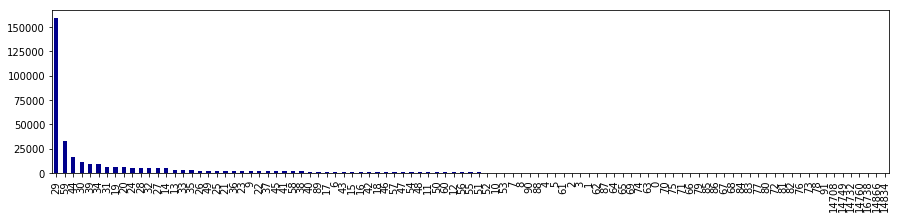

In [39]:
print(df['span'].value_counts())
display(df['span'].value_counts().plot.bar(figsize=(15, 3), color='darkblue'))

In [40]:
# 統計データの確認　
# データ件数がTOP20件
grouped_span = df.groupby('span')
Statistics_span = grouped_span.describe()['achievement_rate']
Statistics_span.sort_values('count', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
span,,,,,,,,
29,159374.00,39.40,52.98,0.00,0.15,6.31,100.92,200.00
59,32578.00,24.16,43.83,0.00,0.01,1.31,18.17,200.00
44,16734.00,36.12,50.42,0.00,0.39,6.36,84.32,199.31
30,11911.00,60.71,56.80,0.00,3.78,39.03,108.91,200.00
39,9443.00,42.03,52.42,0.00,0.70,10.31,101.26,199.80
34,9270.00,48.74,54.30,0.00,1.67,18.27,103.33,199.68
31,6540.00,62.30,56.53,0.00,4.17,46.12,109.44,199.92
19,6287.00,49.30,57.20,0.00,0.25,12.85,105.00,197.71
20,5996.00,64.89,57.86,0.00,3.00,68.32,110.72,199.50


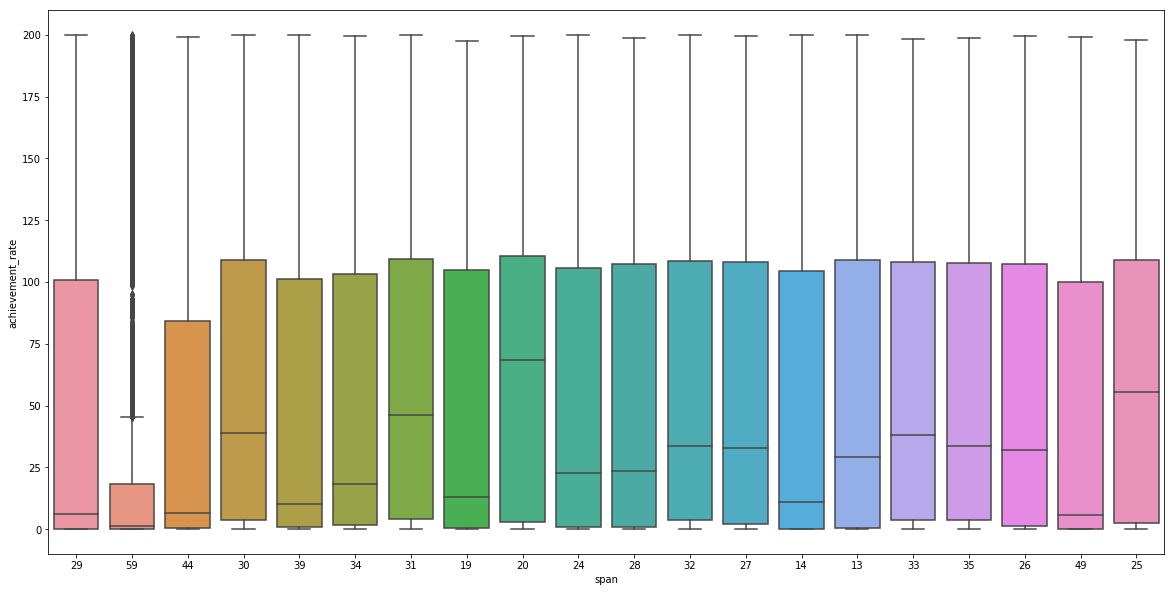

In [41]:
# 統計データを箱ひげ図で可視化
# データ件数がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['span'].isin(Statistics_span.sort_values('count', ascending=False).index[:top_num])], x="span", y="achievement_rate",order=Statistics_span.sort_values('count', ascending=False).index[:top_num])

In [42]:
Statistics_span.sort_values('mean', ascending=False).head(top_num)

,count,mean,std,min,25%,50%,75%,max
span,,,,,,,,
21,2380.00,69.32,57.85,0.00,5.00,100.11,112.68,199.60
15,1432.00,67.95,58.54,0.00,3.30,100.00,111.97,198.32
10,645.00,67.06,58.74,0.00,2.20,100.00,112.00,198.66
18,1208.00,66.28,58.26,0.00,3.00,100.00,111.79,197.21
16,1323.00,66.18,58.89,0.00,2.98,90.33,111.56,199.88
22,1992.00,65.39,57.41,0.00,3.27,100.00,110.84,198.80
20,5996.00,64.89,57.86,0.00,3.00,68.32,110.72,199.50
17,1498.00,64.37,57.90,0.00,2.82,65.51,109.41,199.87
11,850.00,63.35,59.48,0.00,1.26,51.17,111.75,197.30


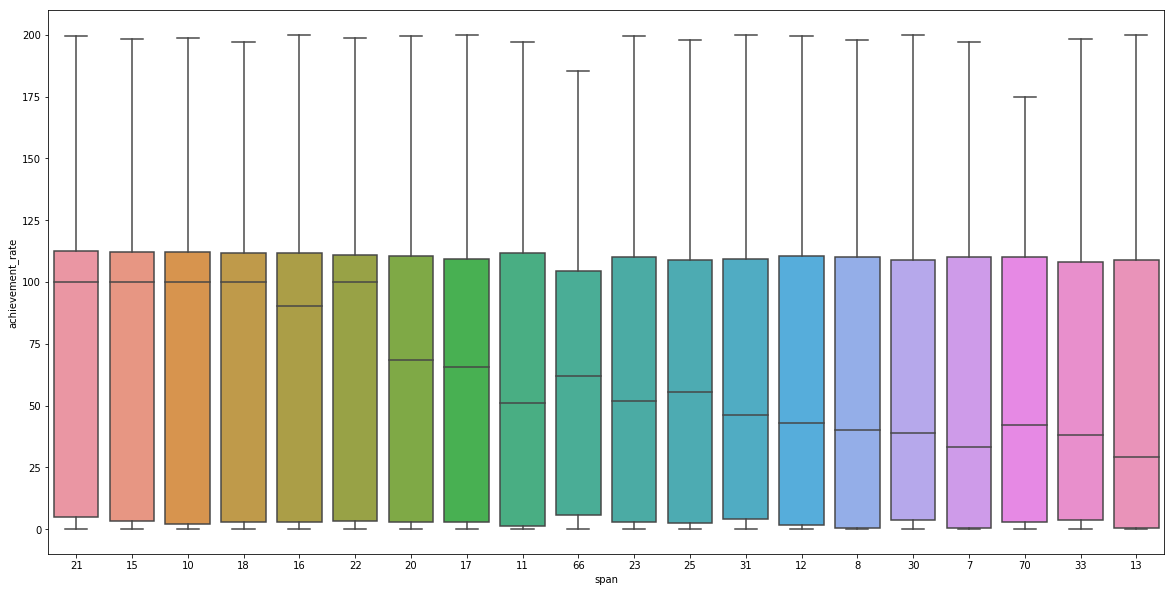

In [43]:
# 統計データを箱ひげ図で可視化
# 「資金調達の達成率」の平均値がTOP20件
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[df['span'].isin(Statistics_span.sort_values('mean', ascending=False).index[:top_num])], x="span", y="achievement_rate",order=Statistics_span.sort_values('mean', ascending=False).index[:top_num])

(90, 95]        22
(75, 80]       267
(80, 85]       289
(70, 75]       348
(65, 70]       394
(60, 65]       678
(0, 5]        1218
(85, 90]      2600
(50, 55]      3576
(5, 10]       5190
(45, 50]      6254
(10, 15]     11534
(20, 25]     14692
(15, 20]     16312
(35, 40]     17222
(40, 45]     23185
(30, 35]     27400
(55, 60]     36792
(25, 30]    184515
Name: span, dtype: int64


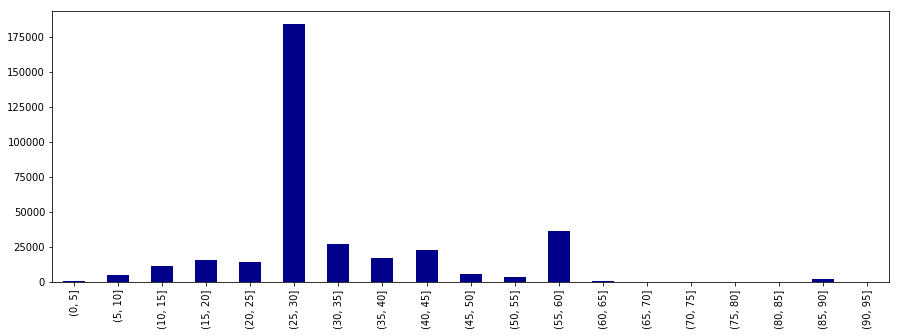

In [44]:
print(pd.cut(df['span'], range(0,96,5)).value_counts(ascending=True))
pd.cut(df['span'], range(0,96,5)).value_counts(sort=False).plot.bar(figsize=(15,5), color='darkblue')

In [45]:
df_groupby_span = df.groupby(pd.cut(df['span'], range(0,96,5)))['achievement_rate'].agg(['count', 'mean', 'std', 'min','median', 'max'])
df_groupby_span

,count,mean,std,min,median,max
span,,,,,,
"(0, 5]",1218,41.61,56.10,0.00,4.00,198.00
"(5, 10]",5190,54.16,59.30,0.00,19.00,199.00
"(10, 15]",11534,56.34,58.99,0.00,24.89,199.89
"(15, 20]",16312,59.04,58.23,0.00,32.73,199.88
"(20, 25]",14692,60.72,57.37,0.00,40.84,199.77
"(25, 30]",184515,42.02,53.98,0.00,8.02,200.00
"(30, 35]",27400,56.29,56.03,0.00,28.99,199.92
"(35, 40]",17222,47.93,54.57,0.00,15.49,199.80
"(40, 45]",23185,40.43,52.33,0.00,8.61,199.31


## spanの分析結果

### 100日以上を異常値とする。（7件） 
### データ件数TOP5  
１位 : 「29」　159374件  
2位 : 「59」　32578件  
3位 : 「44」　16734件  
4位 : 「30」　11911件  
5位 : 「39」　9443件  

### 「資金調達の達成率」の平均値TOP5  
１位 : 「21」　2380件  69.3%  
2位 : 「15」　1432件  67.9%  
3位 : 「10」　645件  67.0%  
4位 : 「18」　1208件  66.2%  
5位 : 「16」　1323件  66.1%  
    

### spanの基礎統計マスタを作成し、説明変数を追加する。
(0~95日）のマスタにおいて、5日区切りで作成する。

# 連続変数の分析

## usd_goal_real

In [46]:
df.describe()

,ID,usd_pledged_real,usd_goal_real,achievement_rate,span
count,352579.00,352579.00,352579.00,352579.00,352579.00
mean,1074915856.36,4442.50,48024.95,43.77,33.75
std,618847254.09,19757.51,1194750.95,54.48,68.23
min,5971.00,0.00,0.01,0.00,0.00
25%,538948408.50,25.00,2200.00,0.30,29.00
50%,1075152949.00,485.00,5821.15,9.48,29.00
75%,1610144070.00,3265.00,16454.95,102.50,37.00
max,2147472329.00,3105473.10,166361390.71,200.00,16738.00


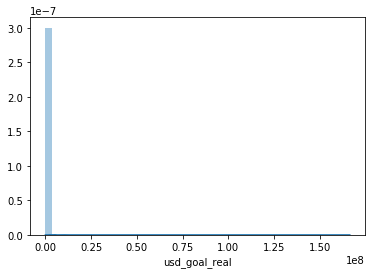

In [47]:
# usd_goal_realを可視化する。
sns.distplot(df['usd_goal_real'])

In [48]:
df[df['usd_goal_real']<20000].describe()

,ID,usd_pledged_real,usd_goal_real,achievement_rate,span
count,270942.00,270942.00,270942.00,270942.00,270942.00
mean,1074966859.64,2344.89,5335.58,49.72,33.03
std,618873408.10,4066.85,4617.83,55.97,77.52
min,18520.00,0.00,0.01,0.00,0.00
25%,538517782.50,25.00,1500.00,0.80,29.00
50%,1075983193.50,460.00,4000.00,15.74,29.00
75%,1610202489.75,2800.00,8000.00,104.69,34.00
max,2147472329.00,39269.00,19999.99,200.00,16738.00


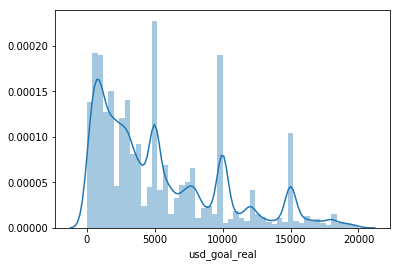

In [49]:
# usd_goal_realが20000以下を再掲
sns.distplot(df[df['usd_goal_real']<20000]['usd_goal_real'])

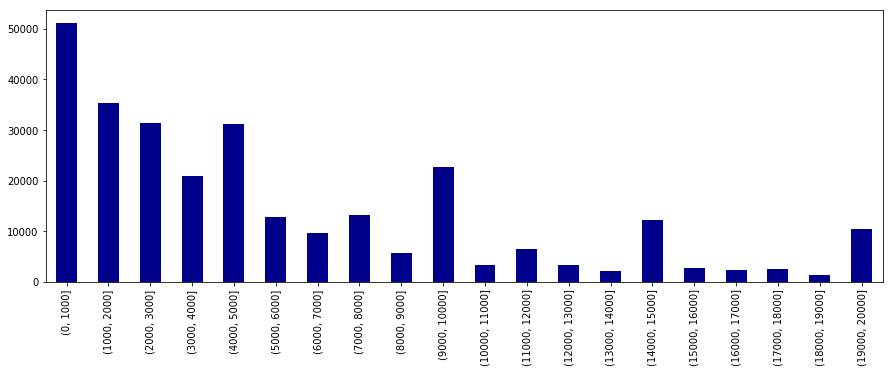

In [50]:
pd.cut(df['usd_goal_real'], range(0,20001,1000)).value_counts(sort=False).plot.bar(figsize=(15,5), color='darkblue')

In [51]:
df_groupusd_goal_real = df.groupby(pd.cut(df['usd_goal_real'], range(0,20001,1000)))['achievement_rate'].agg(['count', 'mean', 'std', 'min','median', 'max'])
df_groupusd_goal_real

,count,mean,std,min,median,max
usd_goal_real,,,,,,
"(0, 1000]",51146,58.06,60.19,0.00,27.00,200.00
"(1000, 2000]",35289,57.20,57.50,0.00,27.73,200.00
"(2000, 3000]",31306,54.49,56.30,0.00,22.50,199.92
"(3000, 4000]",20934,53.62,55.37,0.00,22.52,199.90
"(4000, 5000]",31181,44.41,53.96,0.00,9.62,199.42
"(5000, 6000]",12851,48.09,53.82,0.00,15.30,199.75
"(6000, 7000]",9545,45.85,53.50,0.00,12.56,199.92
"(7000, 8000]",13290,45.64,54.05,0.00,11.57,199.51
"(8000, 9000]",5680,44.86,53.30,0.00,12.27,199.98


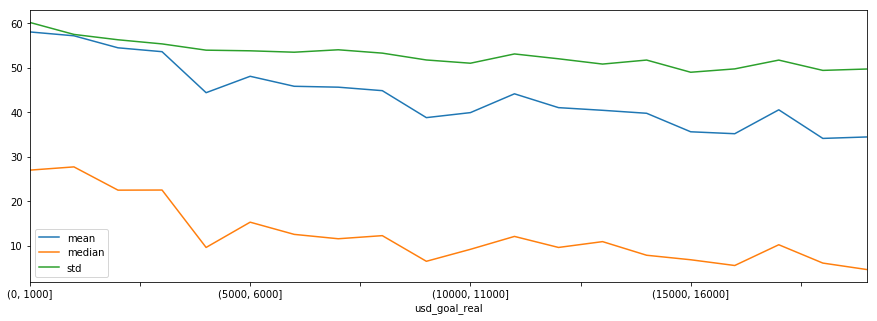

In [52]:
df_groupusd_goal_real[['mean','median','std']].plot(figsize=(15,5))

## 「usd_goal_real」の分析結果
　　
### 基礎統計情報
|       | usd_goal_real |
|-------|---------------|
| count | 352579  |
| mean  | 48024  |
| std   | 1194751  |
| min   | 0  |
| 25%   | 2200  |
| 50%   | 5821  |
| 75%   | 16454  |
| max   | 166361400  |
  
#### コメント
 20000以下は約27万件存在し、全データの79パーセントに当たる。
 <br>
 資金調達の達成率の平均値、中央値、標準偏差はどの値も、目標金額($)が上がると減少傾向にある。
 <br>